<a href="https://colab.research.google.com/github/ramimagnatera/ADA-informes/blob/main/Informe_2_Merge_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

Para el problema de ordenamiento clásico, se nos ingresa una secuencia de números que no están ordenados de forma creciente, para que luego de un procedimiento, se nos entregue como salida el mismo arreglo, pero esta vez ordenado de forma creciente como se ve en el siguiente esquema:

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

El tamaño de este tipo de problemas, depende netamente del tamaño del arreglo ingresado y de que desordenado este se encuentre. 


# 2. Merge Sort

El siguiente código muestra la implementación del algoritmo **Merge Sort**.

In [ ]:
contadorMerge = 0
contadorMergeSort = 0

def merge_sort(lista, verbose = False):
  global contadorMergeSort
  # Cuando la lista tiene 1 elemento la retorna
  if len(lista) < 2:
    return lista
  else:
    middle = len(lista) // 2 # Se obtiene la mitad del arreglo

    right = merge_sort(lista[:middle],verbose) # Se vueve a llamar la función con la parte derecha del arreglo
    contadorMergeSort+=1

    left = merge_sort(lista[middle:],verbose) # Se vuelve llamar la función con la parte izquierda del arreglo
    contadorMergeSort+=1

    if(verbose == True):
      print("Las mitades son: ",right,"y",left)

    return merge(right, left, verbose) # Se mezclan ambas mitades de forma ordenada gracias al merge
    
def merge(lista1, lista2, verbose): 
  global contadorMerge
  i, j , cont= 0, 0, 0 # Se inicializan los contadores en 0
  result = [] # Arreglo Ordenado

  # Se van agregando uno a uno los elementos de los sub-arreglos hasta que uno quede sin elementos
  while(i < len(lista1) and j < len(lista2)): 
      if (lista1[i] < lista2[j]):
        result.append(lista1[i])
        i += 1
      else:
        result.append(lista2[j])
        j += 1
      contadorMerge +=1
 
  #Se agrega el sobrante a la lista
  result += lista1[i:]
  result += lista2[j:]

  if(verbose == True):
    print("El arreglo resultante hasta el momento es: ", result,"\n")
  
  return result

# Prueba del algoritmo
ArregloDePrueba = [4,15,8,12,25,30]
print("Arreglo entrante: ", ArregloDePrueba)
print("Arreglo saliente: ", merge_sort(ArregloDePrueba, verbose = False))
print("Cantidad de comparaciones: ", contadorMerge)
print("Cantidad de llamas recursivas: ", contadorMergeSort)

Arreglo entrante:  [4, 15, 8, 12, 25, 30]
Arreglo saliente:  [4, 8, 12, 15, 25, 30]
Cantidad de comparaciones:  8
Cantidad de llamas recursivas:  10


## 2.2. Descripción del algoritmo

El MergeSort tiene como premisa la frase "Divide y vencerás", puesto que se basa en dividir la compleja tarea de ordenar un arreglo, en sub-problemas más pequeños hasta el punto en tener que comparar únicamente 2 números. Esto se logra gracias a la recursividad que emplea. Básicamente el algoritmo hace lo siguiente:

1. Primero divide el arreglo en dos sub-arreglos de n/2 elementos cada uno.

2. Luego, cada uno de estos subarreglos se ordenan de menor a mayor aplicando la recursividad(lo cual significa que la función se llama a si misma creando un bucle).

3. Finalmente, Los dos sub-arreglos ya ordenados se unen, esto gracias a la función merge, para asi obtener el mismo arreglo de entrada pero esta vez de forma ordenada.

Como la función MergeSort se llama varias veces a si misma, este proceso se repite, llamando nuevamente a la función pero esta vez por cada sub-arreglo generado, dividiendo continuamente el arreglo por partes iguales hasta que queden con un solo elemento, punto donde las mitades  se ordenan, para luego juntarse con otros arreglos pequeños ya ordenados y asi sucesivamente hasta llegar al arreglo de tamaño original. Tal y como veremos en el siguiente ejemplo:




## 2.3. Ejemplo del Algoritmo

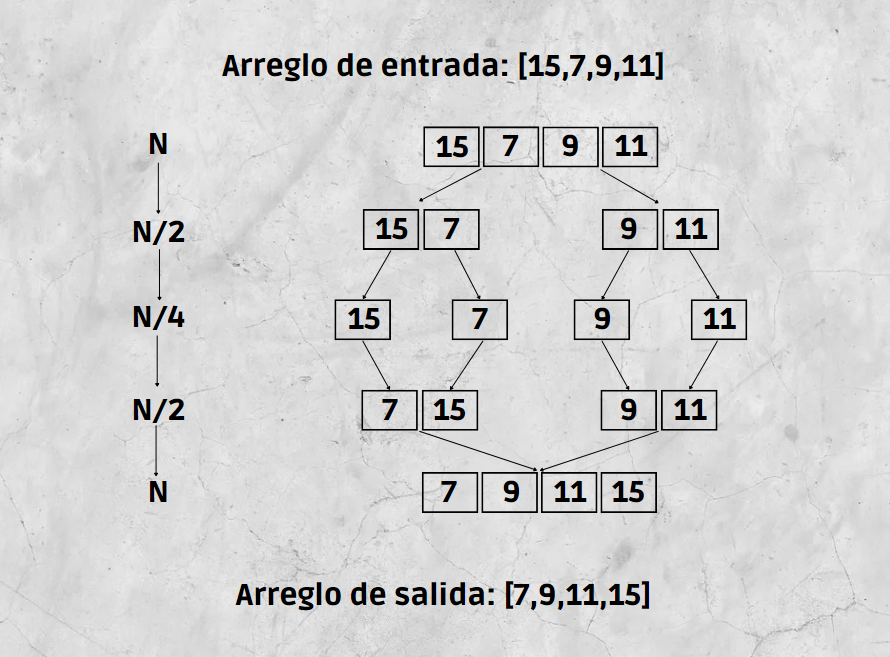

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [ ]:
import random
a = random.sample(range(1, 100), 4)

print("El arreglo ingresado:",a,"\n")

a = merge_sort(a,verbose=True)

print("El arreglo ordenado:",a)

El arreglo ingresado: [59, 1, 51, 68] 

Vuelta número  26
Las mitades son:  [1] y [59]
El arreglo resultante hasta el momento es:  [1, 59] 

Vuelta número  29
Las mitades son:  [68] y [51]
El arreglo resultante hasta el momento es:  [51, 68] 

Vuelta número  30
Las mitades son:  [51, 68] y [1, 59]
El arreglo resultante hasta el momento es:  [1, 51, 59, 68] 

El arreglo ordenado: [1, 51, 59, 68]


# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

El algoritmo **MergeSort** tiene un **tiempo de ejecución** de $O(nLog(n))$ tanto en el mejor, como en el peor de los casos.

## Prueba del teorema

Observando el código, podemos apreciar que tanto para el mejor, como para el peor de los casos, el algoritmo realiza la misma funcionalidad y cantidad de comparaciones. Esto debido a la recursividad que emplea, lo que estandariza la cantidad de números para comparar a lo más estable posible.

Esto podemos verlo en el siguiente árbol de recurrencia:

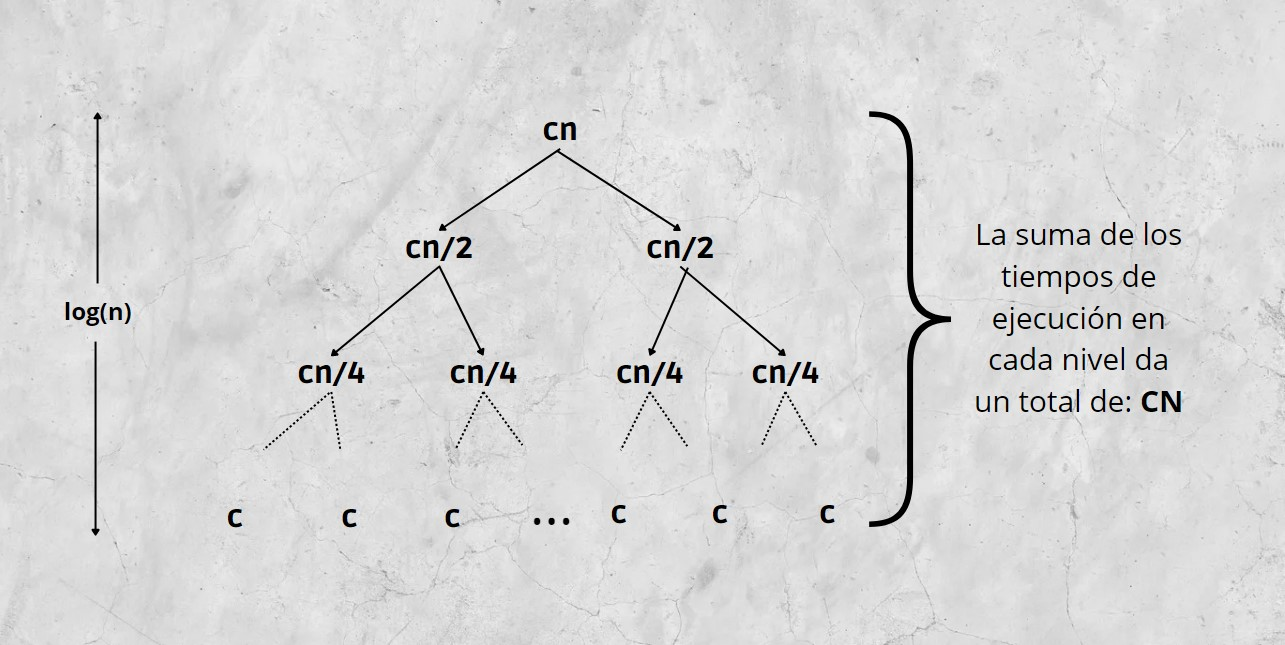

Por un lado, tenemos a la suma de los tiempos de ejecución por nivel, el cual nos da la suma de **CN**, mientras que por otro lado tenemos la cantidad de llamadas recursivas que realiza el algoritmo hasta separar por completo el arreglo, el cual nos da el valor de **Log(n)**.

Por lo tanto, con esto se comprueba que el tiempo de ejecución para el **MergeSort** es de  $nLog(n)$.








# 4. Correctitud

### **Teorema Merge (Correctitud).**

*El algoritmo **Merge** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos de los subarreglos de entrada ordenados de menor a mayor, es decir,,* $a_1'\leq a_2' \leq... \leq a_n'$.

Para comprobar esto, podemos utilizar la llamada propiedad invariante de bucle: 

*En cada iteración, se tienen i elementos ordenados pertenecientes al arreglo resultante, los cuales corresponden a los menores elementos de los sub arreglos originales.*

**Inicialización**: Para la primera iteración, los sub-arreglos que se utilizan para hacer el Merge contienen un solo elemento, por lo que trivialmente están ordenados y son los elementos de menor valor de los respectivos sub arreglos originales, estos son los elementos que compondrán entonces al arreglo resultante.

$ A_1 = [3] $ , $ A_2 = [5] $ , $ A_3 = [1] $ , $ A_4 = [6] $ --> Todos están de manera "ordenada"

**mantención**: Para la mantención se debe analizar lo que ocurre con la i-ésima iteración. En este caso, se asume que los dos sub-arreglo ya están ordenados, Tendiendo en cuenta esto, los elementos de los sub-arreglos se comparan entre ellos, determinando en base a eso sus nuevas posiciones en el arreglo resultante, de esta manera, se asegura que el nuevo arreglo se insertarán de menor a mayor y por consiguiente el arreglo generado también estará ordenado.

 $ A_1 = [3,5] $ , $ A_2 = [1,6] $

*Primera vuelta*: Se compara el 3 con el 1, el menor de ellos se extrae y se inserta en el arreglo nuevo

$ A_1 = [3,5] $ , $ A_2 = [6] $

Arreglo generado: $A = [1]$ --> Hasta este punto el arreglo generado está ordenado

*Segunda vuelta*: Se compara el 3 con el 6, y repitiendo el paso anterior, extrayendolo e intregrandolo en el nuevo arreglo

$ A_1 = [5] $ , $ A_2 = [6] $

Arreglo generado: $ A = [1,3] $ --> El arreglo generado continua de forma ordenada

*Tercera vuelta*: Finalmente, se compara el 5 con el 6, el menor de estos se integra al arreglo generado, y como ya no queda ningun elemento a comparar en el primer arreglo, y se asume que el segundo está de forma ordenada, por lo que se integra al final del nuevo arreglo generado.

Arreglo generado: $ A = [1,3,5,6] $ --> El arreglo generado termina ordenado 

Como podemos comprobar, tanto para la primera iteración, como para una i-ésima iteración, nuestra propiedad de bucle invariante se cumple correctamente, manteniendo de forma continua todos los arreglos de forma ordenada.

### **Teorema MergeSort (Correctitud)**

*El algoritmo **MergeSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

### Prueba de Correctitud (MergeSort)

Para comprobar la correctitud de **algoritmos recursivos** podemos hacerlo mediante la **inducción matemática**. Para esto, debemos probar para una hipótesis $P(n)$ los siguientes casos.

1. Probar $P(n)$ para un **caso base**
2. Probar que si $P(m)$ es cierto para $m<n$, entonces $P(n)$ también lo es.

Nuestra **hipótesis $P(n)$** es que MergeSort retorna un arreglo ordenado de forma creciente. 

**Caso 1**: Cuando $n=1$, MergeSort retorna el único elemento, por lo que se cumple $P(1)$.

**Caso 2**: Debemos comprobar que si $P(m)$ es cierta para $m<n$, entonces también lo es $P(n)$. Cuando tenemos $n$ elementos, el algoritmo divide el arreglo sucesivamente por la mitad, cada uno de estos con una cantidad de $n/2$ y las ordena usando **Mergesort**. Como el tamaño de los subarreglos es menor a $n$, con el paso inductivo asumimos que son ordenadas correctamente. 

Luego, ambos sub-arreglos **son combinados mediante la función Merge**. Según el Teorema 1, Merge retorna un arreglo ordenado con los elementos de los sub-arreglos anteriores, por lo tanto podemos afirmar que el **MergeSort es correcto**.

# 5. Experimentos

##5.1 Número de comparaciones
A continuación se muestra gráficamente una comparación entre:

*   Cantidad de comparaciones en el caso promedio del MergeSort
*   Canitdad de comparaciones en el caso promedio del InsertionSort

para tamaños de problemas con $n$ ∈ [5,19] .

Los arreglos de entrada son generados aleatoriamente entre números del 1 y 100.

In [29]:
def insert_sort(arr):
    cont = 0 # Contador de comparaciones
    tamanio = len(arr) # Tamaño del arreglo

    # recorre todas las posiciones del arreglo
    for i in range(1,tamanio):
        already_sorted = True 

        j = i - 1 # Posición actual en el arreglo
        resp = arr[i] # Creamos una variable de respaldo 

        # Se recorre el arreglo hacia atras intercambiando hasta que sea menor
        while (j>=0 and resp < arr[j]):
            already_sorted = False
            arr[j+1] = arr[j] # Intercambiamos los elementos
            j -= 1 # Disminuimos una posición
            cont += 1 # Aumentamos el contador de comparaciones

        # Reasiganmos la variable 
        arr[j+1] = resp 

        if j != -1: # Se suma una comparación extra luego de cada iteración
            cont+=1
    return arr, cont

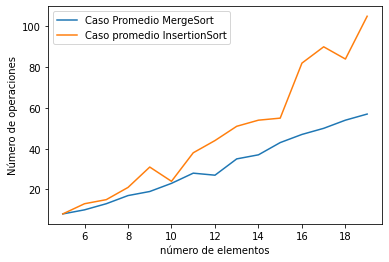

In [37]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)]
y1=[] #caso Promedio MergeSort
y=[]; #caso Promedio InsertSort

for n in range(5,20):
  contadorMerge = 0
  a = random.sample(range(1, 100), n)
  a = merge_sort(a)
  b = random.sample(range(1, 100), n)
  b,cont = insert_sort(b)

  y1.append(contadorMerge)
  y.append(cont)

plt.plot(x,y1)
plt.plot(x,y)
plt.legend(["Caso Promedio MergeSort","Caso promedio InsertionSort"])

plt.xlabel('número de elementos')
plt.ylabel('Número de operaciones')
plt.show()

  Luego de ver el gráfico, podemos apreciar que el MergeSort realiza un número menor de comparaciones que el InsertionSort, además de que este número de comparaciones no varia de forma significativa, si no, que crece de una forma casi constante. Analizando esto, podriamos decir comprobar que el merge sort es más eficiente que el InsertionSort en los casos promedio, reafirmando el hecho que el MergeSort crece en función de nLog(n), mientras que el InsertionSort crece con n elevado a 2.